In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import os
os.chdir(os.path.dirname(os.getcwd()))

import pandas as pd
from resources.constants import *

def density_of_transactions(num_transactions, num_customers, num_articles):
    return num_transactions / (num_customers * num_articles)

HNM_DATASET_PATH = r"resources\other_datasets\HnM_dataset\transactions_train.csv"
NETFLIX_PRIZE_COMPETITION_PATH = r"resources\other_datasets\Netflix_prize_competition"
RENT_THE_RUNWAY_DATASET_PATH = r"resources\other_datasets\renttherunway_final_dataset\renttherunway_final_data.json"

In [12]:
rtr_df = pd.read_json(RENT_THE_RUNWAY_DATASET_PATH, lines=True)
rtr_df.head(2)

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"


In [11]:
rtr_df["user_id"].value_counts().describe(percentiles=[0.25, 0.5, 0.6, 0.68, 0.7, 0.75, 0.9, 0.95, 0.99])

count    105571.000000
mean          1.823834
std           3.074324
min           1.000000
25%           1.000000
50%           1.000000
60%           1.000000
68%           1.000000
70%           2.000000
75%           2.000000
90%           3.000000
95%           5.000000
99%          11.000000
max         436.000000
Name: count, dtype: float64

In [15]:
from decimal import Decimal

num_articles = rtr_df["item_id"].nunique()
num_customers = rtr_df["user_id"].nunique()
num_transactions = rtr_df.shape[0]
print(num_articles, num_customers, num_transactions)

rtr_density = density_of_transactions(num_transactions, num_customers, num_articles)
print(f"Density of transactions: {Decimal(rtr_density):.2E}, Number of users: {Decimal(num_customers)}, Number of outfits: {Decimal(num_articles)}, Number of orders: {Decimal(num_transactions)}")

5850 105571 192544
Density of transactions: 3.12E-4, Number of users: 105571, Number of outfits: 5850, Number of orders: 192544


In [69]:
hnm_df = pd.read_csv(HNM_DATASET_PATH)

In [70]:
hnm_df = hnm_df.drop_duplicates(subset=["article_id", "customer_id"])

In [71]:
num_articles = hnm_df["article_id"].nunique()
num_customers = hnm_df["customer_id"].nunique()
num_transactions = hnm_df.shape[0]
print(num_articles, num_customers, num_transactions)

hnm_density = density_of_transactions(num_transactions, num_customers, num_articles)
hnm_density

104547 1362281 27306439


0.00019172855246088317

In [2]:
from tqdm.notebook import tqdm

#Netflix prize competition

# data_paths = [os.path.join(NETFLIX_PRIZE_COMPETITION_PATH, file) for file in os.listdir(NETFLIX_PRIZE_COMPETITION_PATH)]
# netflix_df = pd.read_csv(data_paths[0], header=None, names=["customer_id", "rating", "date"])
# for path in tqdm(data_paths[1:]):
#     netflix_df = pd.concat([netflix_df, pd.read_csv(path, header=None, names=["customer_id", "rating", "date"])])
# tqdm.pandas()
# current_movie_id = -1

# def parse_dataset_movies(customer_id, rating, data):
#     global current_movie_id

#     if customer_id.endswith(":"):
#         current_movie_id = int(customer_id[:-1])
#         return None
#     else:
#         return current_movie_id

# netflix_df["movie_id"] = netflix_df.progress_apply(lambda row: parse_dataset_movies(row["customer_id"], row["rating"], row["date"]), axis=1)
# netflix_df.to_pickle(os.path.join(NETFLIX_PRIZE_COMPETITION_PATH, "netflix_df.gz"), compression="gzip")

  0%|          | 0/3 [00:00<?, ?it/s]

In [11]:
netflix_df = pd.read_pickle(os.path.join(NETFLIX_PRIZE_COMPETITION_PATH, "netflix_df.gz"), compression="gzip")
netflix_df = netflix_df.dropna()

In [14]:
netflix_value_counts = netflix_df["customer_id"].value_counts()
netflix_value_counts

customer_id
305344     17653
387418     17436
2439493    16565
1664010    15813
2118461    14831
           ...  
1839823        1
2400165        1
2404631        1
454275         1
1808649        1
Name: count, Length: 480189, dtype: int64

In [15]:
netflix_value_counts.describe()

count    480189.000000
mean        209.251997
std         302.339155
min           1.000000
25%          39.000000
50%          96.000000
75%         259.000000
max       17653.000000
Name: count, dtype: float64

In [10]:
num_movies = netflix_df["movie_id"].nunique()
num_customers = netflix_df["customer_id"].nunique()
num_ratings = netflix_df.shape[0]
num_movies, num_customers, num_ratings

(17770, 480189, 100480507)

In [15]:
from decimal import Decimal
netflix_density = density_of_transactions(num_ratings, num_customers, num_movies)
print(f"Density of transactions: {Decimal(netflix_density):.2E}, Number of movies: {Decimal(num_movies)}, Number of customers: {Decimal(num_customers)}, Number of ratings: {Decimal(num_ratings)}")

Density of transactions: 1.18E-2, Number of movies: 17770, Number of customers: 480189, Number of ratings: 100480507


In [29]:
netflix_density

0.01177557662406687

In [17]:

triplets_df = pd.read_csv(USER_ACTIVITY_TRIPLETS_CSV_PATH, sep=CSV_SEPARATOR)
outfits_df = pd.read_csv(OUTFITS_CSV_PATH, sep=CSV_SEPARATOR)

# Append orders from before 2020 to the evaluated dataset
original_orders_df = pd.read_csv(ORIGINAL_ORDERS_CSV_PATH, sep=CSV_SEPARATOR)
triplets_df = pd.concat([triplets_df, original_orders_df], ignore_index=True)

In [18]:
triplets_df = triplets_df.drop_duplicates(subset=["customer.id", "outfit.id"]).copy()

In [19]:
num_users = triplets_df["customer.id"].nunique()
num_outfits = triplets_df["outfit.id"].nunique()
num_orders = triplets_df.shape[0]
num_users, num_outfits, num_orders

(7416, 12193, 69509)

In [20]:
from decimal import Decimal

vibrent_density = density_of_transactions(num_orders, num_users, num_outfits)
print(f"Density of transactions: {Decimal(vibrent_density):.2E} ({vibrent_density}), Number of users: {Decimal(num_users)}, Number of outfits: {Decimal(num_outfits)}, Number of orders: {Decimal(num_orders)}")

Density of transactions: 7.69E-4 (0.0007687068402113402), Number of users: 7416, Number of outfits: 12193, Number of orders: 69509


In [14]:
outfit_group_dict = outfits_df[["id", "group"]].set_index("id").to_dict()["group"]

In [8]:
triplets_df["outfit_group"] = triplets_df["outfit.id"].map(outfit_group_dict)

In [9]:
triplets_df = triplets_df.drop_duplicates(subset=["customer.id", "outfit_group"]).copy()

In [10]:
num_users = triplets_df["customer.id"].nunique()
num_outfits = triplets_df["outfit_group"].nunique()
num_orders = triplets_df.shape[0]
num_users, num_outfits, num_orders

(7416, 7928, 68198)

In [13]:
vibrent_density = density_of_transactions(num_orders, num_users, num_outfits)
print(f"Density of transactions: {Decimal(vibrent_density):.2E} ({vibrent_density}), Number of users: {Decimal(num_users)}, Number of outfits: {Decimal(num_outfits)}, Number of orders: {Decimal(num_orders)}")

Density of transactions: 1.16E-3 (0.0011599473470511846), Number of users: 7416, Number of outfits: 7928, Number of orders: 68198


In [16]:
rtr_density

0.0003117665293831097

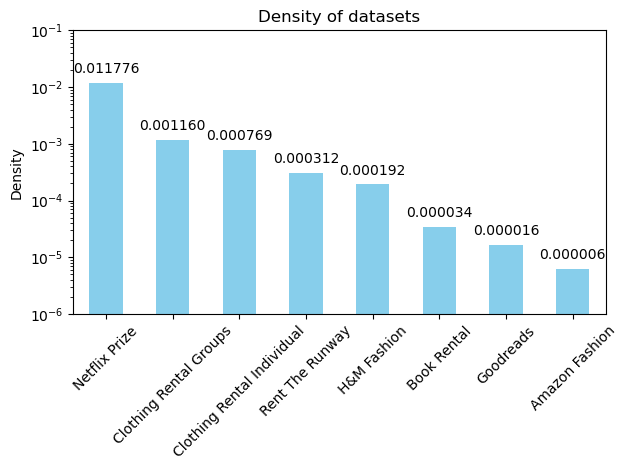

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

DENSITIES = {
    "H&M Fashion": 0.00019172855246088317,
    "Netflix Prize": 0.01177557662406687,
    "Clothing Rental Groups": 0.0011599473470511846,
    "Clothing Rental Individual": 0.0007687068402113402,
    "Rent The Runway": 0.0003117665293831097,
    "Goodreads": 1.6260964205629808e-05,
    "Amazon Fashion": 6.3e-06,
    "Book Rental": 3.4083453369004934e-05
}

densities_df = pd.DataFrame.from_dict(DENSITIES, orient="index", columns=["density"])
densities_df.sort_values(by="density", ascending=False, inplace=True)
densities_df.index.name = "dataset"
densities_df = densities_df.reset_index()

ax = densities_df.plot(kind="bar", x="dataset", y="density", title="Density of datasets", color="skyblue", legend=False)
#ax.set_ylim(0, max(DENSITIES.values()) + 0.0015)
ax.set_ylabel("Density")
ax.set_xlabel("")
ax.set_yscale("log")
ax.set_ylim(1e-6, 1e-1)
ax.set_xticklabels(densities_df["dataset"], rotation=45)

# Annotate the value of each bar
for i in ax.patches:
    ax.annotate(format(i.get_height(), '.6f'), 
                (i.get_x() + i.get_width() / 2., i.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.savefig("reports/figures/density_of_datasets.pdf", format="pdf", bbox_inches="tight")

plt.tight_layout()
plt.show()


In [22]:
# Start of the LaTeX table
latex_table = r"""
\begin{table}[h]
\centering
\begin{tabular}{|l|c|}
\hline
\textbf{Dataset} & \textbf{Density} \\
\hline
"""

# Add each row to the table
for dataset, density in sorted(DENSITIES.items(), key=lambda x: x[1], reverse=True):
    dataset = dataset.replace("&", "\&")
    latex_table += f"{dataset} & {density:.2e} \\\\ \\hline \n"

# End of the LaTeX table
latex_table += r"""\hline
\end{tabular}
\caption{Comparison between the density of various datasets.}
\label{tab:density-comparison}
\end{table}
"""

print(latex_table)


\begin{table}[h]
\centering
\begin{tabular}{|l|c|}
\hline
\textbf{Dataset} & \textbf{Density} \\
\hline
Netflix Prize & 1.18e-02 \\ \hline 
Clothing Rental Groups & 1.16e-03 \\ \hline 
Clothing Rental Individual & 7.69e-04 \\ \hline 
Rent The Runway & 3.12e-04 \\ \hline 
H\&M Fashion & 1.92e-04 \\ \hline 
Book Rental & 3.41e-05 \\ \hline 
Goodreads & 1.63e-05 \\ \hline 
Amazon Fashion & 6.30e-06 \\ \hline 
\hline
\end{tabular}
\caption{Comparison between the density of various datasets.}
\label{tab:density-comparison}
\end{table}



: 

In [85]:
AMAZON_FASHION_DATASET = r"resources\other_datasets\Amazon_fashion\AMAZON_FASHION.json"

amazon_fashion_df = pd.read_json(AMAZON_FASHION_DATASET, lines=True)

In [87]:
num_articles = amazon_fashion_df["asin"].nunique()
num_customers = amazon_fashion_df["reviewerID"].nunique()
num_reviews = amazon_fashion_df.shape[0]
print(num_articles, num_customers, num_reviews)
amazon_fashion_density = density_of_transactions(num_reviews, num_customers, num_articles)
amazon_fashion_density

186189 749233 883636


6.334356237850697e-06

In [90]:
round(amazon_fashion_density, 7)

6.3e-06

In [92]:
amazon_fashion_df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,NaN,NaN
1,2,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3.0,NaN,NaN
2,4,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN,NaN,NaN
3,2,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,NaN,NaN,NaN
4,3,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
883631,5,True,"02 21, 2017",A1ZSB2Q144UTEY,B01HJHTH5U,Amazon Customer,I absolutely love this dress!! It's sexy and ...,I absolutely love this dress,1487635200,NaN,NaN,NaN
883632,5,True,"11 25, 2016",A2CCDV0J5VB6F2,B01HJHTH5U,Amazon Customer,I'm 5'6 175lbs. I'm on the tall side. I wear a...,I wear a large and ordered a large and it stil...,1480032000,2.0,NaN,NaN
883633,3,True,"11 10, 2016",A3O90PACS7B61K,B01HJHTH5U,Fabfifty,Too big in the chest area!,Three Stars,1478736000,NaN,NaN,NaN
883634,3,True,"11 10, 2016",A2HO94I89U3LNH,B01HJHF97K,Mgomez,"Too clear in the back, needs lining",Three Stars,1478736000,NaN,NaN,NaN


In [3]:
GOODREADS_DATASET = r"resources\other_datasets\Goodreads\goodreads_reviews_dedup.json"

goodreads_df = pd.read_json(GOODREADS_DATASET, lines=True)

In [5]:
num_users = goodreads_df["user_id"].nunique()
num_books = goodreads_df["book_id"].nunique()
num_reviews = goodreads_df.shape[0]
print(num_users, num_books, num_reviews)
goodreads_density = density_of_transactions(num_reviews, num_users, num_books)
goodreads_density

465323 2080190 15739967


1.6260964205629808e-05

In [7]:
format(goodreads_density, ".7f")

'0.0000163'

In [19]:
BOOK_RENTAL_PATH = r"resources\other_datasets\book_rental_dataset\BX-Book-Ratings.csv"

book_rental_df = pd.read_csv(BOOK_RENTAL_PATH, sep=",", encoding="latin1")

In [21]:
num_users = book_rental_df["user_id"].nunique()
num_books = book_rental_df["isbn"].nunique()
num_reviews = book_rental_df.shape[0]

book_rental_density = density_of_transactions(num_reviews, num_users, num_books)
print(num_users, num_books, num_reviews)
print(book_rental_density)

95513 322102 1048575
3.4083453369004934e-05


In [23]:
book_rental_df = book_rental_df.drop_duplicates(subset=["user_id", "isbn"])

num_users = book_rental_df["user_id"].nunique()
num_books = book_rental_df["isbn"].nunique()
num_reviews = book_rental_df.shape[0]

book_rental_density = density_of_transactions(num_reviews, num_users, num_books)
print(num_users, num_books, num_reviews)
print(book_rental_density)

95513 322102 1048306
3.40747096463754e-05
